<a href="https://colab.research.google.com/github/kanedc/Learning_Pytorch/blob/main/k_pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#START


In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.6.0+cu124


In [ ]:
import torch
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
#获得张量的维度数
scalar.ndim

0

In [ ]:
#将张量作为Python整型返回
scalar.item()

7

In [ ]:
#vector
vector = torch.tensor([5,5])
vector


tensor([5, 5])

In [ ]:
vector.ndim

In [ ]:
vector.shape

torch.Size([2])

In [ ]:
#MATRIX
MATRIX = torch.tensor([[2,3],[4,5]])
MATRIX

tensor([[2, 3],
        [4, 5]])

In [ ]:
#tensor
TENSOR = torch.tensor([[[1,2,3],[1,2,3],[7,7,7]],[[3,6,3],[1,3,5],[7,7,7]]])
TENSOR

tensor([[[1, 2, 3],
         [1, 2, 3],
         [7, 7, 7]],

        [[3, 6, 3],
         [1, 3, 5],
         [7, 7, 7]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
TENSOR.shape

torch.Size([2, 3, 3])

In [ ]:
#Float 32 tensor
float_32_tensor = torch.tensor([3.0,6.0,9.0],
                 dtype = None,
                 device = None,
                 requires_grad = False)
float_32_tensor

tensor([3., 6., 9.])

In [ ]:
float_16_tensor = float_32_tensor.type(torch.half)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
float_32_tensor * float_16_tensor

tensor([ 9., 36., 81.])

In [ ]:
int_32_tensor = torch.tensor([3,6,9],dtype=torch.long)
int_32_tensor
int_32_tensor.shape

torch.Size([3])

### 从张量中获取信息  （张量的属性）

1 张量的数据类型不正确 -- 从张量中获取数据类型，可以使用tensor.dtype

2 张量的形状不正确 --- 从张量中获得形状信息，使用tensor.shape

3 张量的设备不正确 --- 从张量中获取设备信息，使用tensor.device

In [ ]:
some_tensor = torch.rand(5,7)
some_tensor

tensor([[0.5949, 0.8559, 0.8196, 0.3996, 0.2411, 0.8774, 0.0533],
        [0.7593, 0.0705, 0.6245, 0.1618, 0.3061, 0.2169, 0.5662],
        [0.7482, 0.7939, 0.0798, 0.4092, 0.8990, 0.9322, 0.0458],
        [0.1213, 0.2701, 0.7856, 0.6045, 0.3958, 0.7356, 0.5630],
        [0.3792, 0.6230, 0.7781, 0.7998, 0.4172, 0.4567, 0.5576]])

In [ ]:
print(some_tensor)
print(f"Datatype of tensor:{some_tensor.dtype}")
print(f"Shape of tensor:{some_tensor.shape}")
print(f"Device of tensor:{some_tensor.device}")

tensor([[0.5949, 0.8559, 0.8196, 0.3996, 0.2411, 0.8774, 0.0533],
        [0.7593, 0.0705, 0.6245, 0.1618, 0.3061, 0.2169, 0.5662],
        [0.7482, 0.7939, 0.0798, 0.4092, 0.8990, 0.9322, 0.0458],
        [0.1213, 0.2701, 0.7856, 0.6045, 0.3958, 0.7356, 0.5630],
        [0.3792, 0.6230, 0.7781, 0.7998, 0.4172, 0.4567, 0.5576]])
Datatype of tensor:torch.float32
Shape of tensor:torch.Size([5, 7])
Device of tensor:cpu


### 张量运算 （manipulation tensor）

张量运算：加 减 乘 除 矩阵乘法（点乘）

torch.add
torch.sub
torch.mul
tensor.div
tensor.matmul


###执行矩阵乘法需要满足的两个主要规则：

 内部维度必须匹配  (3,2) @ (2,3)

 得到的矩阵具有外部维度的形状 （3,2）@ （2,3）---> （3,3）

In [ ]:
a=torch.Tensor([1,2,3])
b=torch.Tensor([4,5,6])
#逐元素相乘（element-wise product）
print(torch.mul(a,b))
print(f"* : {a * b}")

tensor([ 4., 10., 18.])
* : tensor([ 4., 10., 18.])


In [ ]:
#点乘 内积 数量积 矩阵乘法
print(f"dot : {torch.dot(a,b)}")
print(f"@ : {a @ b}")
print(f"matmul : {torch.matmul(a,b)}")#matmul方法 支持1D到nD张量，广义矩阵乘法
c=torch.tensor([[3,2],[5,6],[7,8]])
d=torch.tensor([[1,2],[3,4],[1,2]])
print(f"{c.shape} ,{d.shape}")
#print(f"mm : {torch.mm(c,d)}")# mm方法 仅支持二维矩阵，矩阵乘法
print(f"mm : {torch.mm(c,d.T)}")#Transpose - 转置
print(f"mm : {torch.mm(c,d.T).shape}")
print(f"inner : {torch.inner(a,b)}")

dot : 32.0
@ : 32.0
matmul : 32.0
torch.Size([3, 2]) ,torch.Size([3, 2])
mm : tensor([[ 7, 17,  7],
        [17, 39, 17],
        [23, 53, 23]])
mm : torch.Size([3, 3])
inner : 32.0


###在深度学习中最常见的错误之一： 形状错误

In [ ]:
c=torch.tensor([[3,2],[5,6],[7,8]])
d=torch.tensor([[1,2],[3,4],[1,2]])
print(f"{c.shape} ,{d.shape}")
#print(f"mm : {torch.mm(c,d)}")
print(f"mm : {torch.mm(c,d.T)}")#Transpose - 转置

###找到最小值 最大值 平均值 求和 等 张量聚合

In [ ]:
#创建一个张量
a=torch.arange(0,10,1)
a,a.dtype

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.int64)

In [ ]:
#找最小值
print(f"min : {torch.min(a)}")
print(f"min : {a.min()}")
#找最大值
print(f"max : {torch.max(a)}")
print(f"max : {a.max()}")
#找平均值 :torch.mean() 函数 需要一个float32数据类型的张量作为参数才能正常工作
print(f"mean : {torch.mean(a.type(torch.float32))}")

min : 0
min : 0
max : 9
max : 9
mean : 4.5


###找到最大值和最小值所在的位置

In [ ]:
a
#找到张量中最大值的位置
print(f"argmax : {torch.argmax(a)}")
#找到张量中最小值的位置
print(f"argmin : {torch.argmin(a)}")

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

###重塑，堆叠，压缩和解压张量

Reshaping - 将输入张量重塑为定义的形状

View - 返回特定形状的输入张量的视图，但保持与原始张量相同的内存

Stacking - 将多个张量彼此叠加(vstack)或并排组合

Sqeeze - 从tensor中移除所有 1 维度

Unsqeeze - 将 1 维度添加到目标tensor

Permute - 返回以特定方式排列维度的输入视图

In [ ]:
#stack
a_stack = torch.stack([a,a,a,a],dim=0)
a_vstack = torch.vstack([a,a,a,a])

a1_stack = torch.stack([a,a,a,a],dim=1)
a1_hstack = torch.hstack([a,a,a,a])

a_stack,a1_stack
#a_vstack,a1_hstack

(tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
         4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [ ]:
#
x = torch.zeros(2,1,2,1,2)
#x,x.shape

y = torch.squeeze(x)
#y,y.shape

z = torch.unsqueeze(y,0)
z,z.shape

(tensor([[[[0., 0.],
           [0., 0.]],
 
          [[0., 0.],
           [0., 0.]]]]),
 torch.Size([1, 2, 2, 2]))

In [ ]:
x = torch.randn(2,3,5)
x,x.shape
#torch.permute 按照特定顺序重新排列目标张量的维度
torch.permute(x,(2,0,1)).shape#移动轴 2->0,0->1,1->2


torch.Size([5, 2, 3])

In [ ]:
tensor = torch.tensor([[[1,2,3],[2,3,4],[3,4,5]],[[11,22,33],[22,33,44],[33,44,55]]])
#tensor,tensor.shape
# print(tensor)
# print(tensor[1][0])
# print(tensor[1][0][1])
# print(tensor[:,:,1])
# print(tensor[:,1,1])
print(tensor[:,:,2])
print(tensor[0][:][2])


tensor([[ 3,  4,  5],
        [33, 44, 55]])
tensor([3, 4, 5])


In [ ]:
#Numpy 和 Pytorch
import torch
import numpy as np

array = np.arange(1.0,8.0)
tensor = torch.from_numpy(array)
#tensor = torch.from_numpy(array).type(torch.float32)#更改数据类型
array,tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
tensor.dtype

torch.float64

###Numpy和Tensor不共享内存

In [ ]:
#改变数组的值，张量的值不变
array = array + 1
array,tensor

(array([3., 4., 5., 6., 7., 8., 9.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
#tensor转换为Numpy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor,numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
#改变数组的值，张量的值不变
tensor = tensor + 1
tensor,numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

#Reproducbility(可重复性） 试图从随机数中取出随机数

简而言之，怎么学习神经网络:

  `从随机数开始-->张量运算-->更新随机数尝试让他们成为数据-->不断重复过程

在神经网络中为了减少随机性，Pytorch引入了 随机种子 的概念。本质上来说，随机种子就像是给随机性加了“调味料”，让随机过程可控、可复现

随机和伪随机



In [ ]:
import torch

#创建两个随机张量
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)


tensor([[0.8201, 0.1228, 0.0567, 0.1008],
        [0.9988, 0.1132, 0.8333, 0.4140],
        [0.5629, 0.0952, 0.6209, 0.6936]])
tensor([[0.0489, 0.1857, 0.5264, 0.7832],
        [0.6933, 0.4183, 0.3166, 0.1932],
        [0.1811, 0.6204, 0.1120, 0.6321]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


##Random tensor
 **why random tensor ?**


随机张量很重要，因为许多神经网络的学习方式是从充满随机数的张量开始，然后调整这些随机数以更好地表示数据。

`从随机数开始---》看数据 ---》更新随机数---》看数据 ---》更新随机数`



In [ ]:
#创建一个大小为（10,10）的随机张量
random_tensor = torch.rand(1,10,10)
random_tensor

tensor([[[0.1529, 0.9025, 0.8489, 0.4150, 0.5600, 0.2663, 0.2428, 0.2295,
          0.7473, 0.0965],
         [0.6904, 0.4083, 0.3204, 0.7130, 0.1319, 0.1181, 0.2118, 0.7558,
          0.7221, 0.5840],
         [0.6895, 0.9780, 0.1235, 0.1053, 0.5895, 0.2376, 0.8681, 0.3117,
          0.7327, 0.6862],
         [0.7443, 0.8271, 0.1272, 0.8364, 0.2972, 0.9539, 0.0899, 0.5019,
          0.1885, 0.9171],
         [0.4022, 0.6199, 0.9154, 0.0867, 0.6048, 0.3804, 0.7256, 0.8117,
          0.7622, 0.6219],
         [0.6991, 0.5111, 0.5848, 0.7434, 0.6522, 0.2416, 0.0588, 0.9347,
          0.5310, 0.5372],
         [0.5976, 0.3652, 0.7969, 0.1172, 0.9153, 0.0111, 0.3385, 0.3487,
          0.3327, 0.9165],
         [0.7894, 0.4550, 0.2210, 0.6110, 0.8890, 0.2808, 0.8776, 0.6887,
          0.2855, 0.8053],
         [0.8220, 0.0625, 0.9129, 0.0649, 0.2850, 0.2496, 0.3327, 0.1475,
          0.3137, 0.7256],
         [0.9846, 0.7176, 0.7626, 0.7228, 0.3009, 0.1711, 0.4894, 0.6855,
          0.8647,

In [ ]:
random_tensor.ndim

3

In [ ]:
random_tensor.shape

torch.Size([1, 10, 10])

In [ ]:
#创建一个和图像张量相似的随机张量
random_image_size_tensor = torch.rand(3,224,224) #第一个参数为颜色通道数，其后的两个参数为图片的高和宽
random_image_size_tensor.ndim, random_image_size_tensor.shape

(3, torch.Size([3, 224, 224]))

##Zeros and Ones

In [ ]:
#创建一个全0的张量
zeros = torch.zeros(size=(3,3))
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
#创建一个全1的张量
ones = torch.ones(size=(7,7))
ones

tensor([[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
ones.dtype, random_tensor.dtype

(torch.float32, torch.float32)

## Creating a range of tensors and tensors-like

In [ ]:
#使用torch.range(start,end,step)
one_to_nine = torch.arange(1,10)
one_to_nine

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#创建tensors like
ten_zeros = torch.zeros_like(input=one_to_nine)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
if torch.accelerator.is_available():
  tensor = tensor.to(torch.accelerator.current_accelerator())

In [ ]:
t1 = torch.cat([ten_zeros,ten_zeros,ten_zeros],dim=0)
t1

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [ ]:
#算术运算  矩阵乘法
tensor = torch.rand(1,2,3)
y1 = tensor @ tensor.mT
y2 = tensor.matmul(tensor.mT)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.mT, out=y3)

tensor([[[0.7219, 0.5885],
         [0.5885, 1.1352]]])

In [ ]:
#逐元素乘
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[[0.2447, 0.0008, 0.4763],
         [0.3000, 0.6538, 0.1815]]])

In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

2.996220111846924 <class 'float'>


In [ ]:
print(f"{tensor}/n")
tensor.add_(7)
print(f"{tensor}")

tensor([[[0.4947, 0.0291, 0.6901],
         [0.5477, 0.8086, 0.4260]]])/n
tensor([[[7.4947, 7.0291, 7.6901],
         [7.5477, 7.8086, 7.4260]]])


## Dataset and DataLoader



###  Dataset



In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

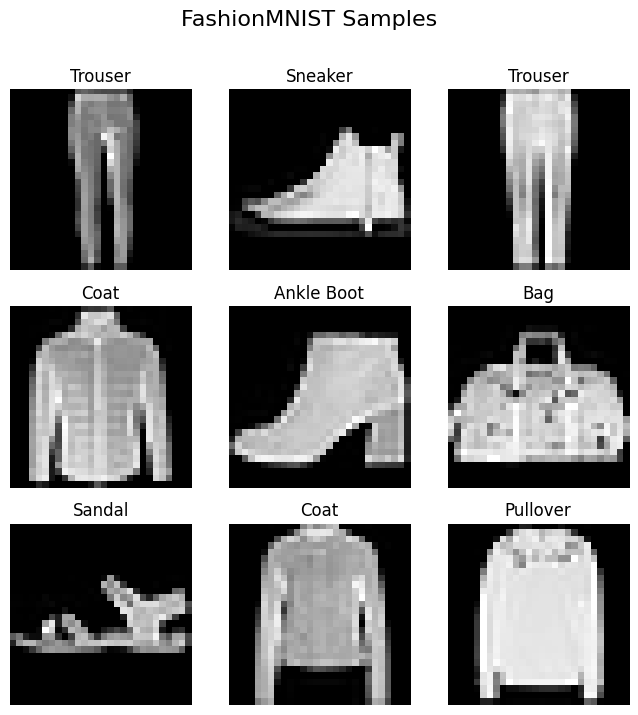

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols,rows = 3,3
plt.suptitle("FashionMNIST Samples", fontsize=16)
for i in range(1,cols * rows + 1):
  sample_idx = torch.randint(len(training_data),size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform = None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self,idx):
    img_path = os.path.join(self.img_dir,self.img_labels.iloc[idx, 0])
    image = decode_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label



### DataLoader

DataLoader 实现结果是 将获取到的样本合成批次（batch）
过程是 从 数据集 中按照某种 采样策略 生成一系列 索引，然后根据这些索引从数据集中 取出样本，而后将这些样本合成批次

索引 → 数据集 → 样本 → 批次

整个训练流程：
Epoch → (批次 → (索引 → 数据集 → 样本 → 批次)) → 模型更新 → Epoch

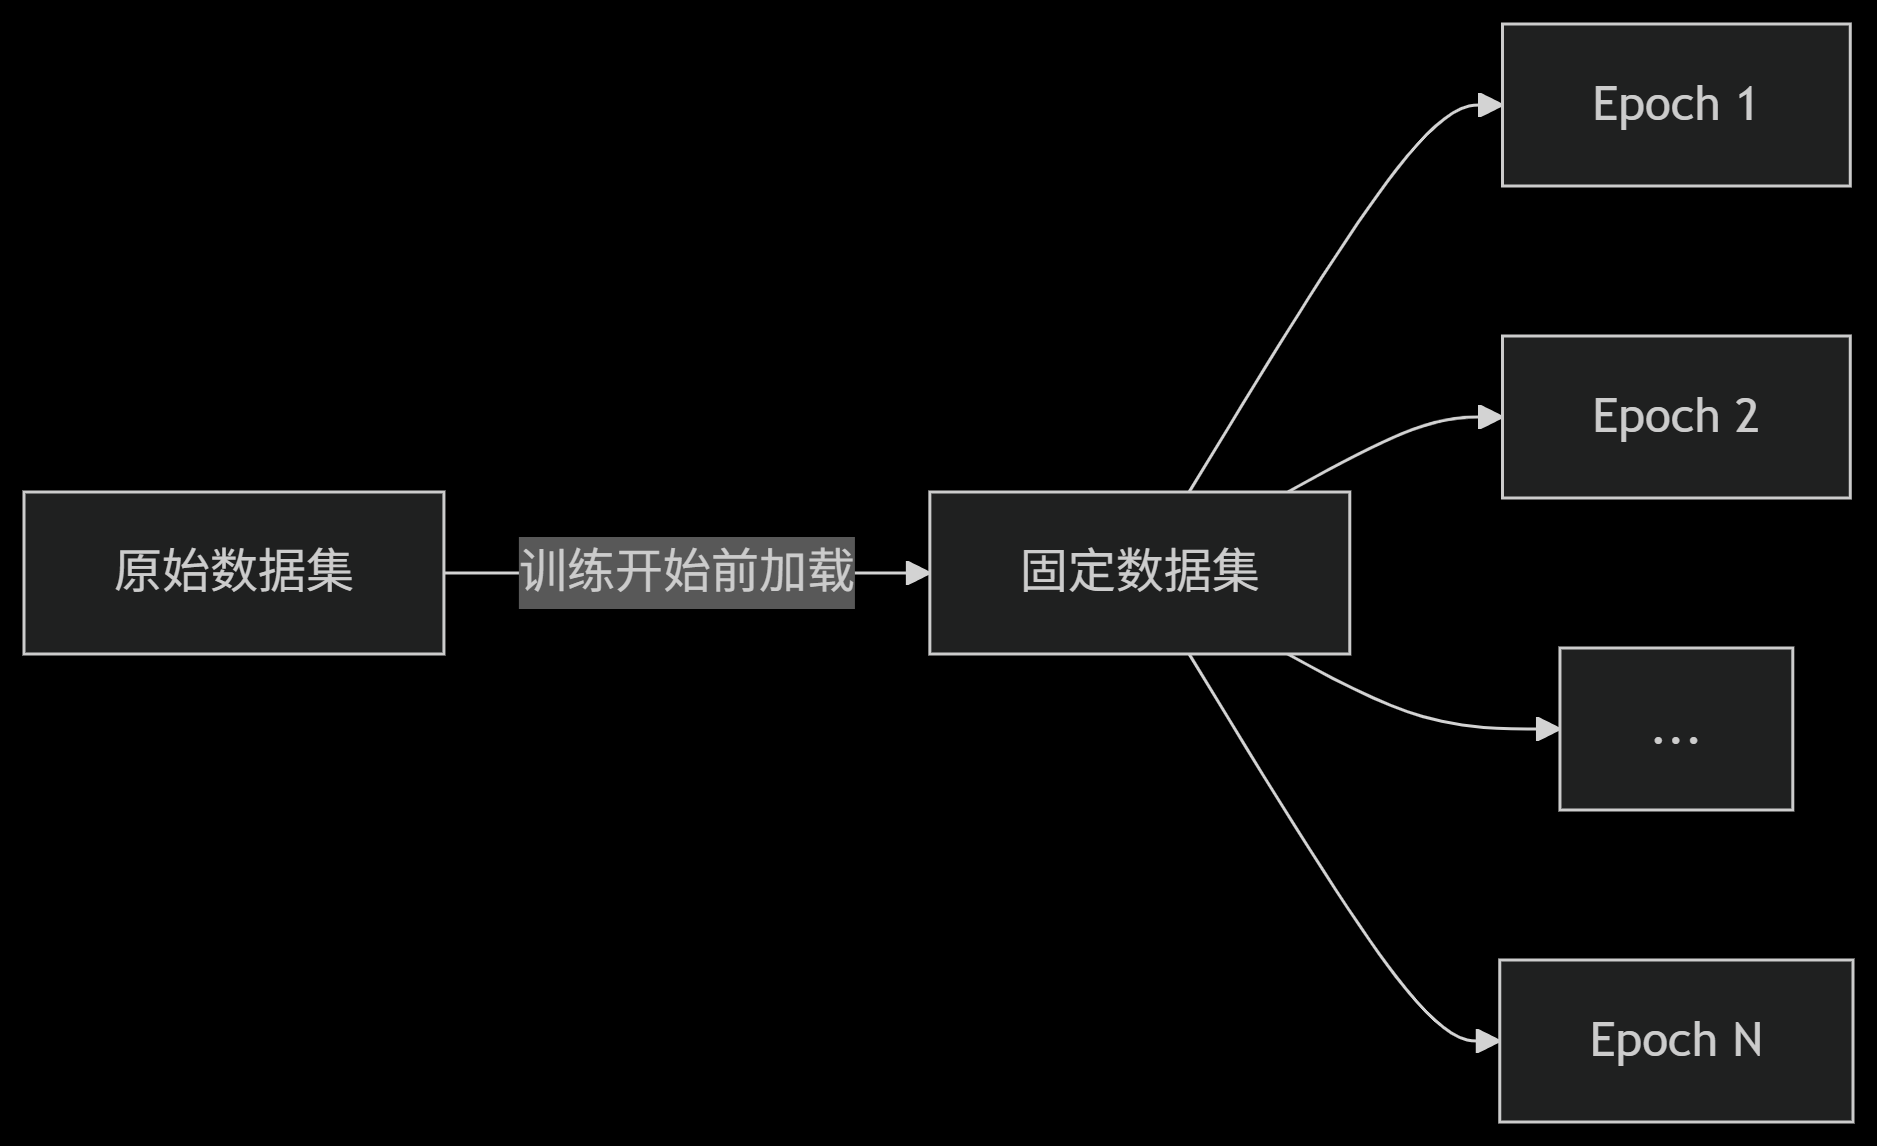

Feature batch shape:torch.Size([64, 1, 28, 28])
Labels batch shape:torch.Size([64])


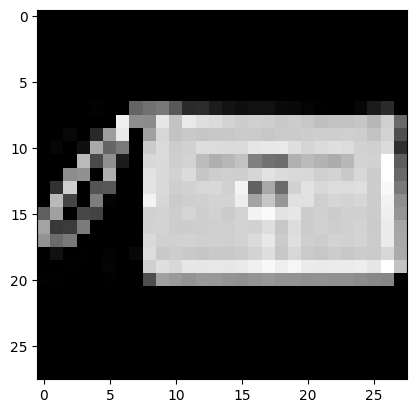

Label:8


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64,shuffle=True)

#展示图片和标签
#iter 创建迭代器 next 从迭代器中获取下一个批次的数据
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape:{train_features.size()}")
print(f"Labels batch shape:{train_labels.shape}")
#从每一个批次中获取第一个样本
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label:{label}")

###涉及到专用名词 SGD（stochastic Gradient Descent）随机梯度下降

基本定义：是一种用于优化目标函数的迭代算法

核心思想和工作原理：

    目标：找到使损失函数J（θ）最小化的模型参数θ（例如权重和偏置） ？疑问点？
    梯度信息：算法利用损失函数关于参数 θ 的梯度∇J(θ)信息。梯度指向函数值增加最快的方向，因此其反方向指向下降最快的方向

    随机的本质：SGD和标准GD的区别核心：
      标准GD：在每次参数更新之前，计算整个训练数据集。这在大数据集上计算代价高昂
      SGD：在每次参数更新时，仅基于单个随机选择的训练样本（或非常小的随机子集，Minibatch SGD）计算梯度估计值∇J(θ; x⁽ⁱ⁾, y⁽ⁱ⁾)

  关键特点：计算高效 频繁更新 引入随机

    优点：逃离局部极小值  在线学习
    缺点：收敛路劲震荡 收敛速度变慢 对学习率敏感 不易并行化


##Transform

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y),value=1))
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 273kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.03MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.92MB/s]


In [ ]:
import torch
from torchvision.transforms import v2

H,W = 32,32
img = torch.randint(0,256,size=(3,H,W),dtype=torch.uint8)

transforms = v2.Compose([
    v2.RandomResizedCrop(size=(224,224),antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32,scale=True),
    v2.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225]),
])
img = transforms(img)

##构建神经网络

神经网络----由层/模块组成，那是由什么样的模块和层组成呢----对数据执行操作的模块/层

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
#
#获取训练设备，当存在加速器（CUDA,MPS等）时,使用加速器，不存在时选择cpu
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")


Using cuda device


###定义类


In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10),
    )

  def forward(self,x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
X = torch.rand(1,28,28,device=device)
logits = model(X)

#样本和类别的关系是：每个样本属于一个类别，我们通过样本的特征来预测它所属的类别。

#Softmax() 将logits张量 沿着类别维度进行归一化操作 功能：指数化 归一化 输出概率分布
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([1], device='cuda:0')


###模型层

In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())
print(flat_image)

torch.Size([3, 784])
tensor([[0.8595, 0.5281, 0.0612,  ..., 0.1346, 0.4963, 0.1090],
        [0.0926, 0.7381, 0.8118,  ..., 0.7771, 0.5595, 0.1749],
        [0.4758, 0.5950, 0.2248,  ..., 0.2957, 0.3918, 0.7949]])


In [ ]:
layer1=nn.Linear(in_features=28*28,out_features=20)
hidden1=layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])
